In [7]:
import os, sys
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import matplotlib.animation as manimation

plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['animation.embed_limit'] = 4000  # for 4 panel 73 frame, we need more than 3 GB
plt.rcParams['animation.ffmpeg_path'] = "/home/louis.wicker/miniconda3/bin/ffmpeg"

# See things in the browser...
%matplotlib inline

_reduce_image = False

#-----------------------------------------------
# handy timer function

class timeit():
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))
        
#------------------------------------------------
# function to read images, and if needed, rescale

def read_png(rundir, fhour, plottype, time, www_dir = None):
 
# create image filename

    plotname = (plottype % time)
    image_path = os.path.join(rundir, fhour, plotname)
    
    if www_dir != None:
        image_path = os.path.join(www_dir, image_path)
    
# Read Image 

    img = mpimg.imread(image_path)
    
    if _reduce_image:
        
        (width, height) = (img.width // 2, img.height // 2)
        return img.resize((width, height),PIL.Image.LANCZOS)

    else:
        return img


In [8]:
def plot_animation(fig, fhour, times, rundirs, plottypes, www_dir = None):
    
    nrows   = len(rundirs)
    ncols   = len(plottypes)
    
    print("Frames will be %i rows and %i columns" % (nrows, ncols))
        
    artists = []

    npanel = 0

    for ptype in plottypes:  
        
        for dir in rundirs:  

            print('Now processing Run: %s  for plottype:  %s' % (dir, ptype[:-11].upper()))
        
            npanel += 1   # this is the location of each image over time in the plot

            ax = fig.add_subplot(nrows, ncols, npanel)

            plt.subplots_adjust(top = 0.95, bottom = 0.05, right = 0.95, left = 0.05, hspace = 0.1, wspace = 0.1)

            # now plot every image for the panel slot in ax.subplots()  Then we append all of those 
            # plots in time together in list ax_artists, and then append all 4 sequences into list artists[]

            ax_artists = []

            for t in times: 
                image = read_png(dir, fhour, ptype, t, www_dir=www_dir)
                img = ax.imshow(image, animated=True)
                txt = ax.set_title('%s     %s' %(os.path.split(dir)[-1], ptype[:-10].upper()))
                ax_artists.append([txt,img])

            # Append each temporal sequence of frames for one subplot regions over time into artists[]

            artists.append(ax_artists)
            
    print('Created all the artist images, now reorganizing...')

    # Take the per-subplot panel lists of artists and join them together to get
    # one list, where each new list is the list of all articles to draw in a single frame
    # Example, if there are 4 panels, there are 4 members in the artists lists, each with a sequence
    # of images from the temporal sequence.  By using *zip, all 4 lists items are created in
    # 'panel_artists' as a 4 member list.  Then break these into single panels, and then attach
    # them together into a single new list called frame which now has a membership of all four panels
    # for each time.  So artists[] had a dimension of [nrows*ncols, len(time)], and now new_artists 
    # has a dimension of [len(time), nrows*ncols]

    
    new_artists = []
    for panel_artists in zip(*artists):
        frame = []
        for panel in panel_artists:
            frame.extend(panel)
        new_artists.append(frame)
        
    print('Completed creation of multi-panel sequence, returning...')
        
    # return the new list
    
    return new_artists

In [11]:
def plot_animation2(fig, fhour, times, frames):
    
    artists = []

    npanel = 0
    
    # gotta do some list mangling
    nrows  = len(frames)
    ncols  = np.int(sum( [ len(item) for item in frames]) / nrows)
    
    print("Frames will be %i rows and %i columns" % (nrows, ncols))
    
    for frow in frames: 
        
        for fitem in frow:
        
            print('Now processing Run: %s  for plottype:  %s' % (fitem[0], fitem[1][:-11].upper()))

            npanel += 1   # this is the location of each image over time in the plot

            ax = fig.add_subplot(nrows, ncols, npanel)

            plt.subplots_adjust(top = 0.95, bottom = 0.05, right = 0.95, left = 0.05, hspace = 0.1, wspace = 0.1)

            # now plot every image for the panel slot in ax.subplots()  Then we append all of those 
            # plots in time together in list ax_artists, and then append all 4 sequences into list artists[]

            ax_artists = []

            for t in times: 
                image = read_png(fitem[0], fhour, fitem[1], t)
                img = ax.imshow(image, animated=True)
                txt = ax.set_title('%s     %s' %(os.path.split(fitem[0])[-1], fitem[1][:-10].upper()))
                ax_artists.append([txt,img])

            # Append each temporal sequence of frames for one subplot regions over time into artists[]

            artists.append(ax_artists)
            
    print('Created all the artist images, now reorganizing...')

    # Take the per-subplot panel lists of artists and join them together to get
    # one list, where each new list is the list of all articles to draw in a single frame
    # Example, if there are 4 panels, there are 4 members in the artists lists, each with a sequence
    # of images from the temporal sequence.  By using *zip, all 4 lists items are created in
    # 'panel_artists' as a 4 member list.  Then break these into single panels, and then attach
    # them together into a single new list called frame which now has a membership of all four panels
    # for each time.  So artists[] had a dimension of [nrows*ncols, len(time)], and now new_artists 
    # has a dimension of [len(time), nrows*ncols]

    
    new_artists = []
    for panel_artists in zip(*artists):
        frame = []
        for panel in panel_artists:
            frame.extend(panel)
        new_artists.append(frame)
        
    print('Completed creation of multi-panel sequence, returning...')
        
    # return the new list
    
    return new_artists

Making:  ../May29_movies/May29_UH90_F23_Comparison.mp4
Images will be 1 rows and 3 columns
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  MRMS_MID
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  UH_2TO5_90
runtime: 0:00:02.339002


FileNotFoundError: [Errno 2] No such file or directory: '/www/wof.nssl.noaa.gov/newse_images/20180529/2300/uh_2to5_90_f175.png'

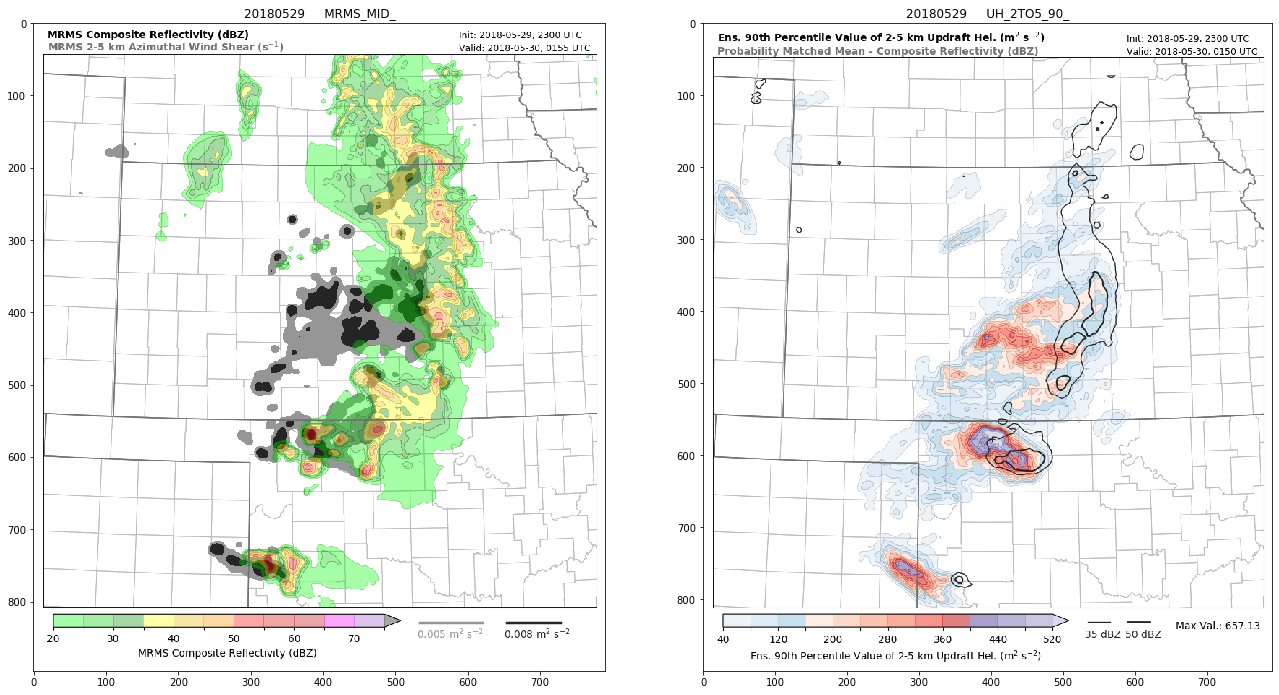

In [21]:
# This is the fancy version - and if you want to plot images (like MRMS verification images) that are not
# present in all the run directories, then you have to lay this out explicitly like this.

# www_res  = '/www/wof.nssl.noaa.gov/newse_research'
# www_rt   = '/www/wof.nssl.noaa.gov/newse_images'

_show = False

frames  = [
           [['/www/wof.nssl.noaa.gov/newse_images/20180529','mrms_mid_f%3.3i.png'],      \
            ['/www/wof.nssl.noaa.gov/newse_images/20180529','uh_2to5_90_f%3.3i.png'],    \
            ['/www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA','uh_2to5_90_f%3.3i.png']], \
          ]

nrows  = 1
ncols  = 3

times  = 5*(np.arange(175/5))  # this needs to be a list or array to iterate over in a for loop

for fhour in ['2300']:
             
    fname_movie = '../May29_movies/May29_UH90_F%s_Comparison.mp4' % fhour[0:2]
    print("Making:  %s" % fname_movie)

    fig    = plt.figure(figsize=(10*ncols, 10*nrows))

    with timeit():
        movie = plot_animation2(fig, fhour, times, frames)


    with timeit():
       my_anim = manimation.ArtistAnimation(fig, movie, interval=100, blit=True)

    with timeit():
        my_anim.save(fname_movie, writer='ffmpeg', dpi=50)

    # Animate the images
    if _show:
        my_anim


Making:  ../May29_movies/May29_UH90_F23_Comparison.mp4
Images will be 1 rows and 3 columns
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  MRMS_MID
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  UH_2TO5_PROB_9KM
Now processing Run: /www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA  for plottype:  UH_2TO5_PROB_9KM
Created all the artist images, now reorganizing...
Completed creation of multi-panel sequence, returning...
runtime: 0:00:07.118502
runtime: 0:00:02.319557
runtime: 0:00:10.151981


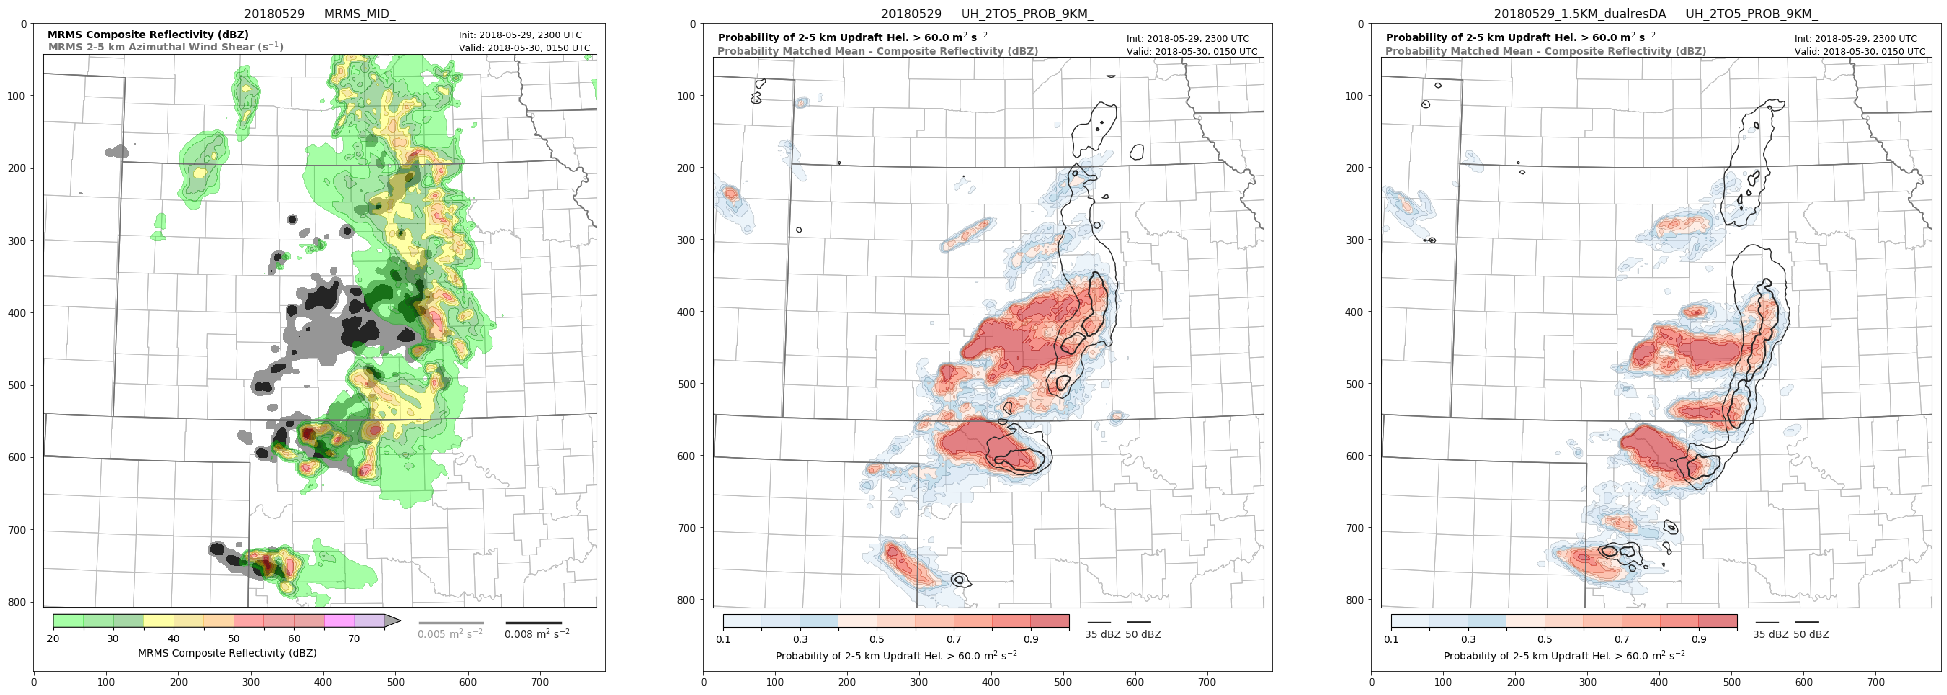

In [23]:
# This is the fancy version - and if you want to plot images (like MRMS verification images) that are not
# present in all the run directories, then you have to lay this out explicitly like this.

# www_res  = '/www/wof.nssl.noaa.gov/newse_research'
# www_rt   = '/www/wof.nssl.noaa.gov/newse_images'

             
_show = False
# The frames list must be multi-dimensional, e.g., a list of lists

frames  = [
           [['/www/wof.nssl.noaa.gov/newse_images/20180529','mrms_mid_f%3.3i.png'],      \
            ['/www/wof.nssl.noaa.gov/newse_images/20180529','uh_2to5_prob_9km_f%3.3i.png'],    \
            ['/www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA','uh_2to5_prob_9km_f%3.3i.png']] \
          ]

nrows  = 1
ncols  = 3

times  = 5*(np.arange(175/5))  # this needs to be a list or array to iterate over in a for loop

for fhour in ['2300']:
             
    fname_movie = '../May29_movies/May29_UH90_F%s_Comparison.mp4' % fhour[0:2]
    print("Making:  %s" % fname_movie)

    fig    = plt.figure(figsize=(10*ncols, 10*nrows))

    with timeit():
        movie = plot_animation2(fig, fhour, times, frames)


    with timeit():
       my_anim = manimation.ArtistAnimation(fig, movie, interval=100, blit=True)

    with timeit():
        my_anim.save(fname_movie, writer='ffmpeg', dpi=50)

    # Animate the images
    if _show:
        my_anim

Making:  ../May29_movies/May29_CAPECIN_F19_Comparison.mp4
Images will be 2 rows and 2 columns
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  MLCAPE
Now processing Run: /www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA  for plottype:  MLCAPE
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  MLCIN
Now processing Run: /www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA  for plottype:  MLCIN
Created all the artist images, now reorganizing...
Completed creation of multi-panel sequence, returning...
runtime: 0:00:09.251501
runtime: 0:00:02.929292
Done saving file: ../May29_movies/May29_CAPECIN_F19_Comparison.mp4
runtime: 0:00:13.554229
Making:  ../May29_movies/May29_CAPECIN_F21_Comparison.mp4
Images will be 2 rows and 2 columns
Now processing Run: /www/wof.nssl.noaa.gov/newse_images/20180529  for plottype:  MLCAPE
Now processing Run: /www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA  for plo

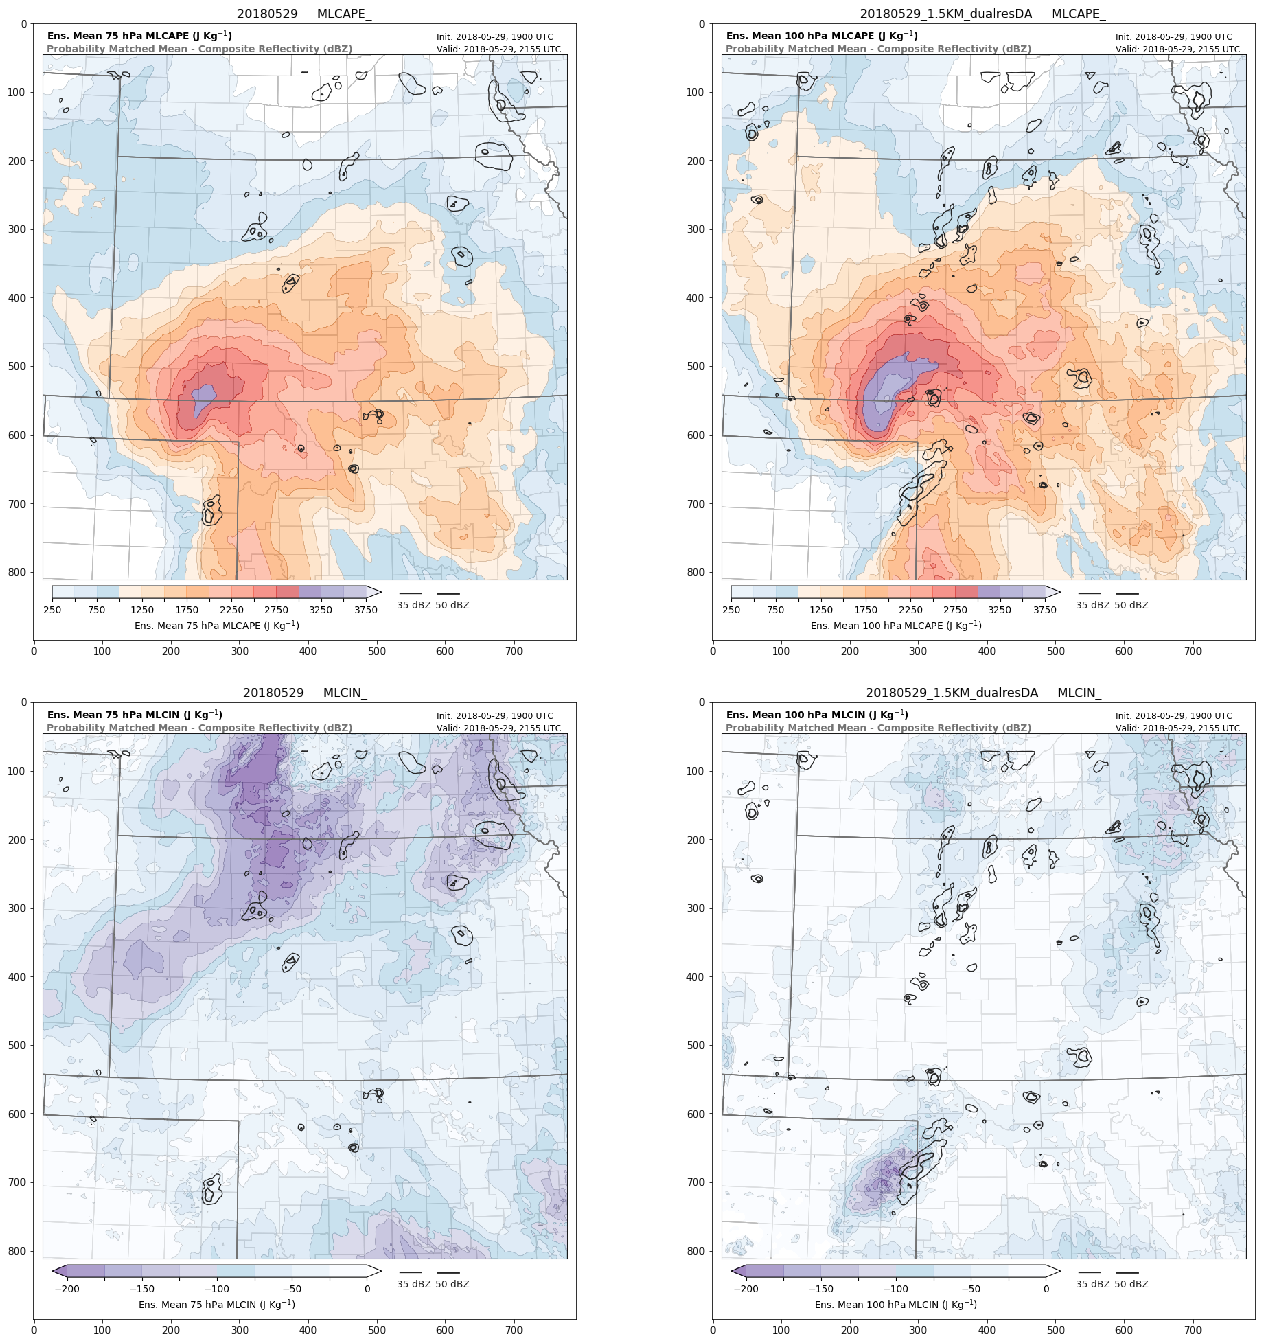

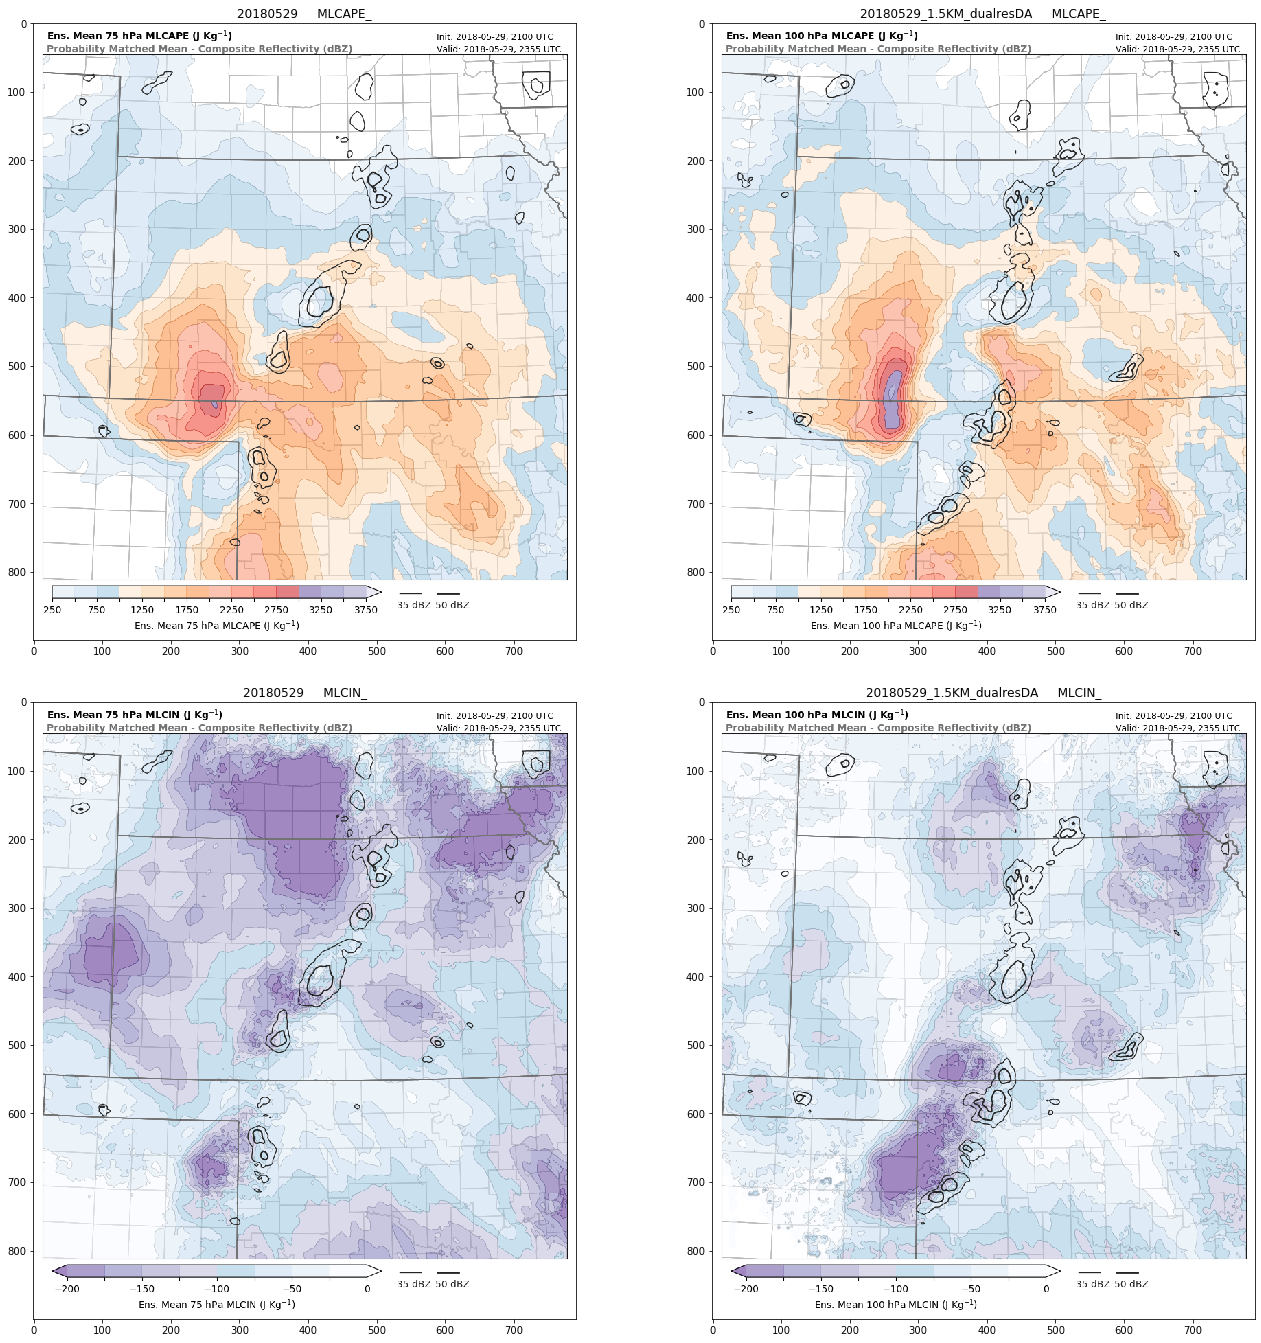

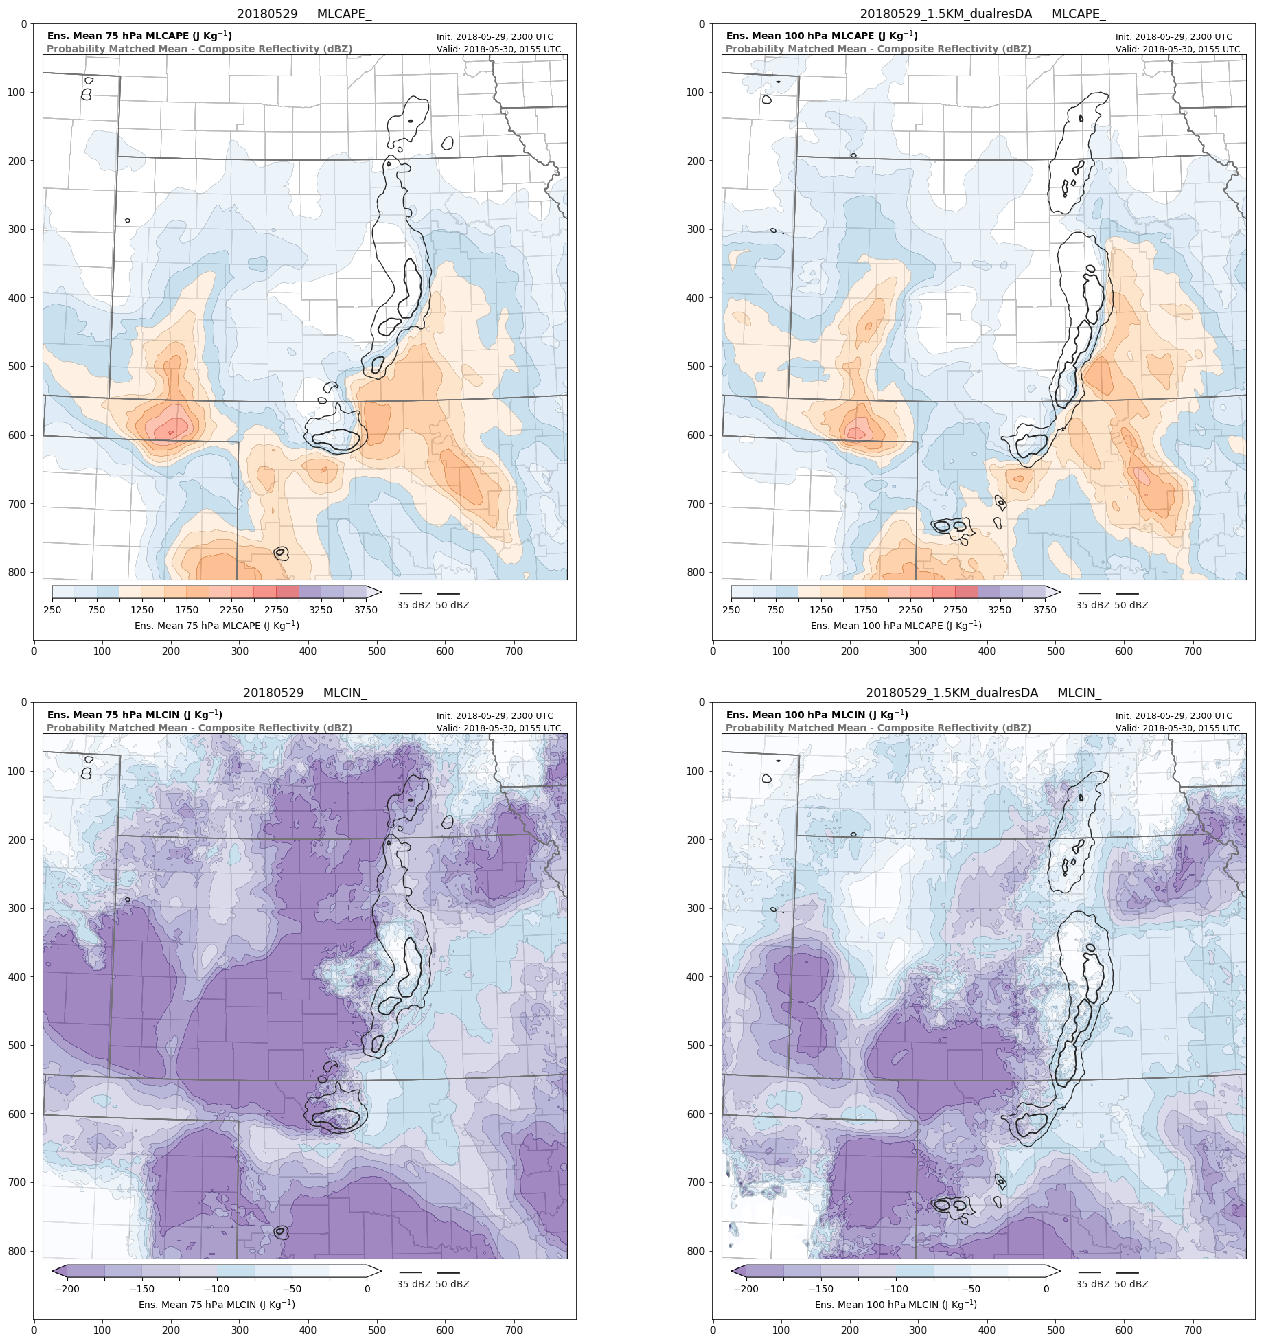

In [25]:
# This is the fancy version - and if you want to plot images (like MRMS verification images) that are not
# present in all the run directories, then you have to lay this out explicitly like this.

# www_res  = '/www/wof.nssl.noaa.gov/newse_research'
# www_rt   = '/www/wof.nssl.noaa.gov/newse_images'

             
_show = False
# The frames list must be multi-dimensional, e.g., a list of lists

frames  = [
           [['/www/wof.nssl.noaa.gov/newse_images/20180529','mlcape_f%3.3i.png'],      \
            ['/www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA','mlcape_f%3.3i.png']], \
           [['/www/wof.nssl.noaa.gov/newse_images/20180529','mlcin_f%3.3i.png'],      \
            ['/www/wof.nssl.noaa.gov/newse_research/20180529_1.5KM_dualresDA','mlcin_f%3.3i.png']] \
          ]

nrows  = 2
ncols  = 2

times  = 5*(np.arange(180/5))  # this needs to be a list or array to iterate over in a for loop

for fhour in ['1900','2100','2300']:
             
    fname_movie = '../May29_movies/May29_CAPECIN_F%s_Comparison.mp4' % fhour[0:2]
    print("Making:  %s" % fname_movie)

    fig    = plt.figure(figsize=(10*ncols, 10*nrows))

    with timeit():
        movie = plot_animation2(fig, fhour, times, frames)


    with timeit():
       my_anim = manimation.ArtistAnimation(fig, movie, interval=100, blit=True)

    with timeit():
        my_anim.save(fname_movie, writer='ffmpeg', dpi=50)
    
    print('Done saving file: %s' % fname_movie)

    # Animate the images
    if _show:
        my_anim